In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oHFGxCFTQ7ihoLo9UtFd")
project = rf.workspace("wooddefects").project("wood_2_3")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 33.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server-proxy 4.1.0 requires aiohttp, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not 


Extracting Dataset Version Zip to wood_2_3-2 in yolov8:: 100%|██████████| 9098/9098 [00:01<00:00, 4786.91it/s]


In [2]:
!tree -d /kaggle/working/wood_2_3-2
!mkdir wood_data 

/kaggle/working/wood_2_3-2
|-- test
|   |-- images
|   `-- labels
|-- train
|   |-- images
|   `-- labels
`-- valid
    |-- images
    `-- labels

9 directories


In [3]:
import os
import shutil

def merge_folders(source_dirs, target_images_dir, target_labels_dir):
    if not os.path.exists(target_images_dir):
        os.makedirs(target_images_dir)
    
    if not os.path.exists(target_labels_dir):
        os.makedirs(target_labels_dir)
    
    for source_dir in source_dirs:
        for subdir, _, files in os.walk(source_dir):
            if 'images' in subdir:
                for file in files:
                    src_file = os.path.join(subdir, file)
                    dst_file = os.path.join(target_images_dir, file)
                    shutil.copy(src_file, dst_file)
                    #print(f"Copied {src_file} to {dst_file}")
            elif 'labels' in subdir:
                for file in files:
                    src_file = os.path.join(subdir, file)
                    dst_file = os.path.join(target_labels_dir, file)
                    shutil.copy(src_file, dst_file)
                    #print(f"Copied {src_file} to {dst_file}")

def main():
    base_dir = '/kaggle/working/wood_2_3-2'
    
    source_dirs = [
        os.path.join(base_dir, 'test/images'),
        os.path.join(base_dir, 'test/labels'),
        os.path.join(base_dir, 'train/images'),
        os.path.join(base_dir, 'train/labels'),
        os.path.join(base_dir, 'valid/images'),
        os.path.join(base_dir, 'valid/labels')
    ]
    
    target_images_dir = os.path.join('wood_data/images')
    target_labels_dir = os.path.join('wood_data/labels')
    
    merge_folders(source_dirs, target_images_dir, target_labels_dir)

if __name__ == "__main__":
    main()
    print("OK~")

OK~


In [4]:
import os
from PIL import Image

def resize_image(image_path, output_path, height):
 
    img = Image.open(image_path)
    width_percent = (height / float(img.size[1]))
    new_width = int((float(img.size[0]) * float(width_percent)))
    img = img.resize((new_width, height), Image.Resampling.LANCZOS)
    img.save(output_path)

def process_images(images_dir, output_dir, height):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for filename in os.listdir(images_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(images_dir, filename)
            output_path = os.path.join(output_dir, filename)
            resize_image(image_path, output_path, height)
#             print(f"Resized and saved {filename} to {output_path}")

images_dir = '/kaggle/working/wood_data/images'  
output_dir = '/kaggle/working/wood_data/images_640' 
height = 640  

process_images(images_dir, output_dir, height)
print("OK！")

OK！


In [5]:
import os

def rename_files(images_dir, images_640_dir, labels_dir, prefix):
    images_files = sorted(os.listdir(images_dir))
    images_640_files = sorted(os.listdir(images_640_dir))
    labels_files = sorted(os.listdir(labels_dir))
    
    if not (len(images_files) == len(images_640_files) == len(labels_files)):
        raise ValueError("The number of files in the directories do not match.")
    
    for i, (img_file, img_640_file, label_file) in enumerate(zip(images_files, images_640_files, labels_files), start=1):
        new_name = f"{prefix}-{i:04d}"
        
        # Get file extensions
        img_ext = os.path.splitext(img_file)[1]
        img_640_ext = os.path.splitext(img_640_file)[1]
        label_ext = os.path.splitext(label_file)[1]
        
        # Construct new file names
        new_img_name = f"{new_name}{img_ext}"
        new_img_640_name = f"{new_name}{img_640_ext}"
        new_label_name = f"{new_name}{label_ext}"
        
        # Full paths
        img_path = os.path.join(images_dir, img_file)
        img_640_path = os.path.join(images_640_dir, img_640_file)
        label_path = os.path.join(labels_dir, label_file)
        
        new_img_path = os.path.join(images_dir, new_img_name)
        new_img_640_path = os.path.join(images_640_dir, new_img_640_name)
        new_label_path = os.path.join(labels_dir, new_label_name)
        
        # Rename files
        os.rename(img_path, new_img_path)
        os.rename(img_640_path, new_img_640_path)
        os.rename(label_path, new_label_path)
        
#         print(f"Renamed {img_file} -> {new_img_name}")
#         print(f"Renamed {img_640_file} -> {new_img_640_name}")
#         print(f"Renamed {label_file} -> {new_label_name}")

def main():
    images_dir = '/kaggle/working/wood_data/images'  
    images_640_dir = '/kaggle/working/wood_data/images_640'  
    labels_dir = '/kaggle/working/wood_data/labels'  
    prefix = "woods-4class"
    
    rename_files(images_dir, images_640_dir, labels_dir, prefix)

if __name__ == "__main__":
    main()
    print("OK!")

OK!


In [6]:
!mkdir wood_data/train
!mkdir wood_data/valid 
!mkdir wood_data/train/images 
!mkdir wood_data/train/labels 

!mkdir wood_data/valid/images 
!mkdir wood_data/valid/labels 

In [7]:
import os
import random
import shutil

def create_dirs(base_dir, sub_dirs):
    for sub_dir in sub_dirs:
        full_path = os.path.join(base_dir, sub_dir)
        if not os.path.exists(full_path):
            os.makedirs(full_path)

def split_dataset(all_images_dir, all_labels_dir, output_base_dir, train_ratio=0.9):
    # Create train and valid directories
    create_dirs(output_base_dir, ['train/images', 'train/labels', 'valid/images', 'valid/labels'])

    # Get list of all images and corresponding labels
    images = sorted([f for f in os.listdir(all_images_dir) if os.path.isfile(os.path.join(all_images_dir, f))])
    labels = sorted([f for f in os.listdir(all_labels_dir) if os.path.isfile(os.path.join(all_labels_dir, f))])

    # Ensure the number of images matches the number of labels
    assert len(images) == len(labels), "The number of images and labels must be the same"

    # Shuffle the dataset
    dataset = list(zip(images, labels))
    random.shuffle(dataset)

    # Split the dataset
    split_idx = int(len(dataset) * train_ratio)
    train_set = dataset[:split_idx]
    valid_set = dataset[split_idx:]

    # Copy files to the respective directories
    train_images, train_labels = zip(*train_set)
    valid_images, valid_labels = zip(*valid_set)

    for img_file, label_file in zip(train_images, train_labels):
        shutil.move(os.path.join(all_images_dir, img_file), os.path.join(output_base_dir, 'train/images', img_file))
        shutil.move(os.path.join(all_labels_dir, label_file), os.path.join(output_base_dir, 'train/labels', label_file))

    for img_file, label_file in zip(valid_images, valid_labels):
        shutil.move(os.path.join(all_images_dir, img_file), os.path.join(output_base_dir, 'valid/images', img_file))
        shutil.move(os.path.join(all_labels_dir, label_file), os.path.join(output_base_dir, 'valid/labels', label_file))

    print(f"Total number of images: {len(images)}")
    print(f"Training set: {len(train_set)} images ({train_ratio * 100:.2f}%)")
    print(f"Validation set: {len(valid_set)} images ({(1 - train_ratio) * 100:.2f}%)")

def main():
    base_dir = '/kaggle/working/'
    all_images_dir = os.path.join(base_dir, 'wood_data/images_640')
    all_labels_dir = os.path.join(base_dir, 'wood_data/labels')
    output_base_dir = os.path.join(base_dir, "wood_data")

    split_dataset(all_images_dir, all_labels_dir, output_base_dir)

if __name__ == "__main__":
    main()

Total number of images: 4543
Training set: 4088 images (90.00%)
Validation set: 455 images (10.00%)


In [8]:
# !mv train wood_data/train 
# !mv valid wood_data/valid 

!rm -rf wood_data/images/ wood_data/images_640
!rm -rf wood_data/labels/ 
!tree -d wood_data 

wood_data
|-- train
|   |-- images
|   `-- labels
`-- valid
    |-- images
    `-- labels

6 directories


In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    labels = []
    for line in lines:
        class_id, center_x, center_y, width, height = map(float, line.strip().split())
        labels.append((int(class_id), center_x, center_y, width, height))
    return labels

def draw_labels(image, labels, class_names):
    h, w, _ = image.shape
    for label in labels:
        class_id, center_x, center_y, width, height = label
        # Convert from YOLO format to bounding box format
        x1 = int((center_x - width / 2) * w)
        y1 = int((center_y - height / 2) * h)
        x2 = int((center_x + width / 2) * w)
        y2 = int((center_y + height / 2) * h)
        # Draw rectangle and label
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, class_names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

def plot_images_with_labels(image_files, label_files, class_names, output_file, max_images=12):
    max_images = 12

    image_files = image_files[:max_images]
    label_files = label_files[:max_images]

    num_cols = 4
    num_rows = (len(image_files) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, (image_file, label_file) in enumerate(zip(image_files, label_files)):
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        labels = load_labels(label_file)
        image = draw_labels(image, labels, class_names)
        axes[i].imshow(image)
        axes[i].axis('off')

    for ax in axes[len(image_files):]:
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

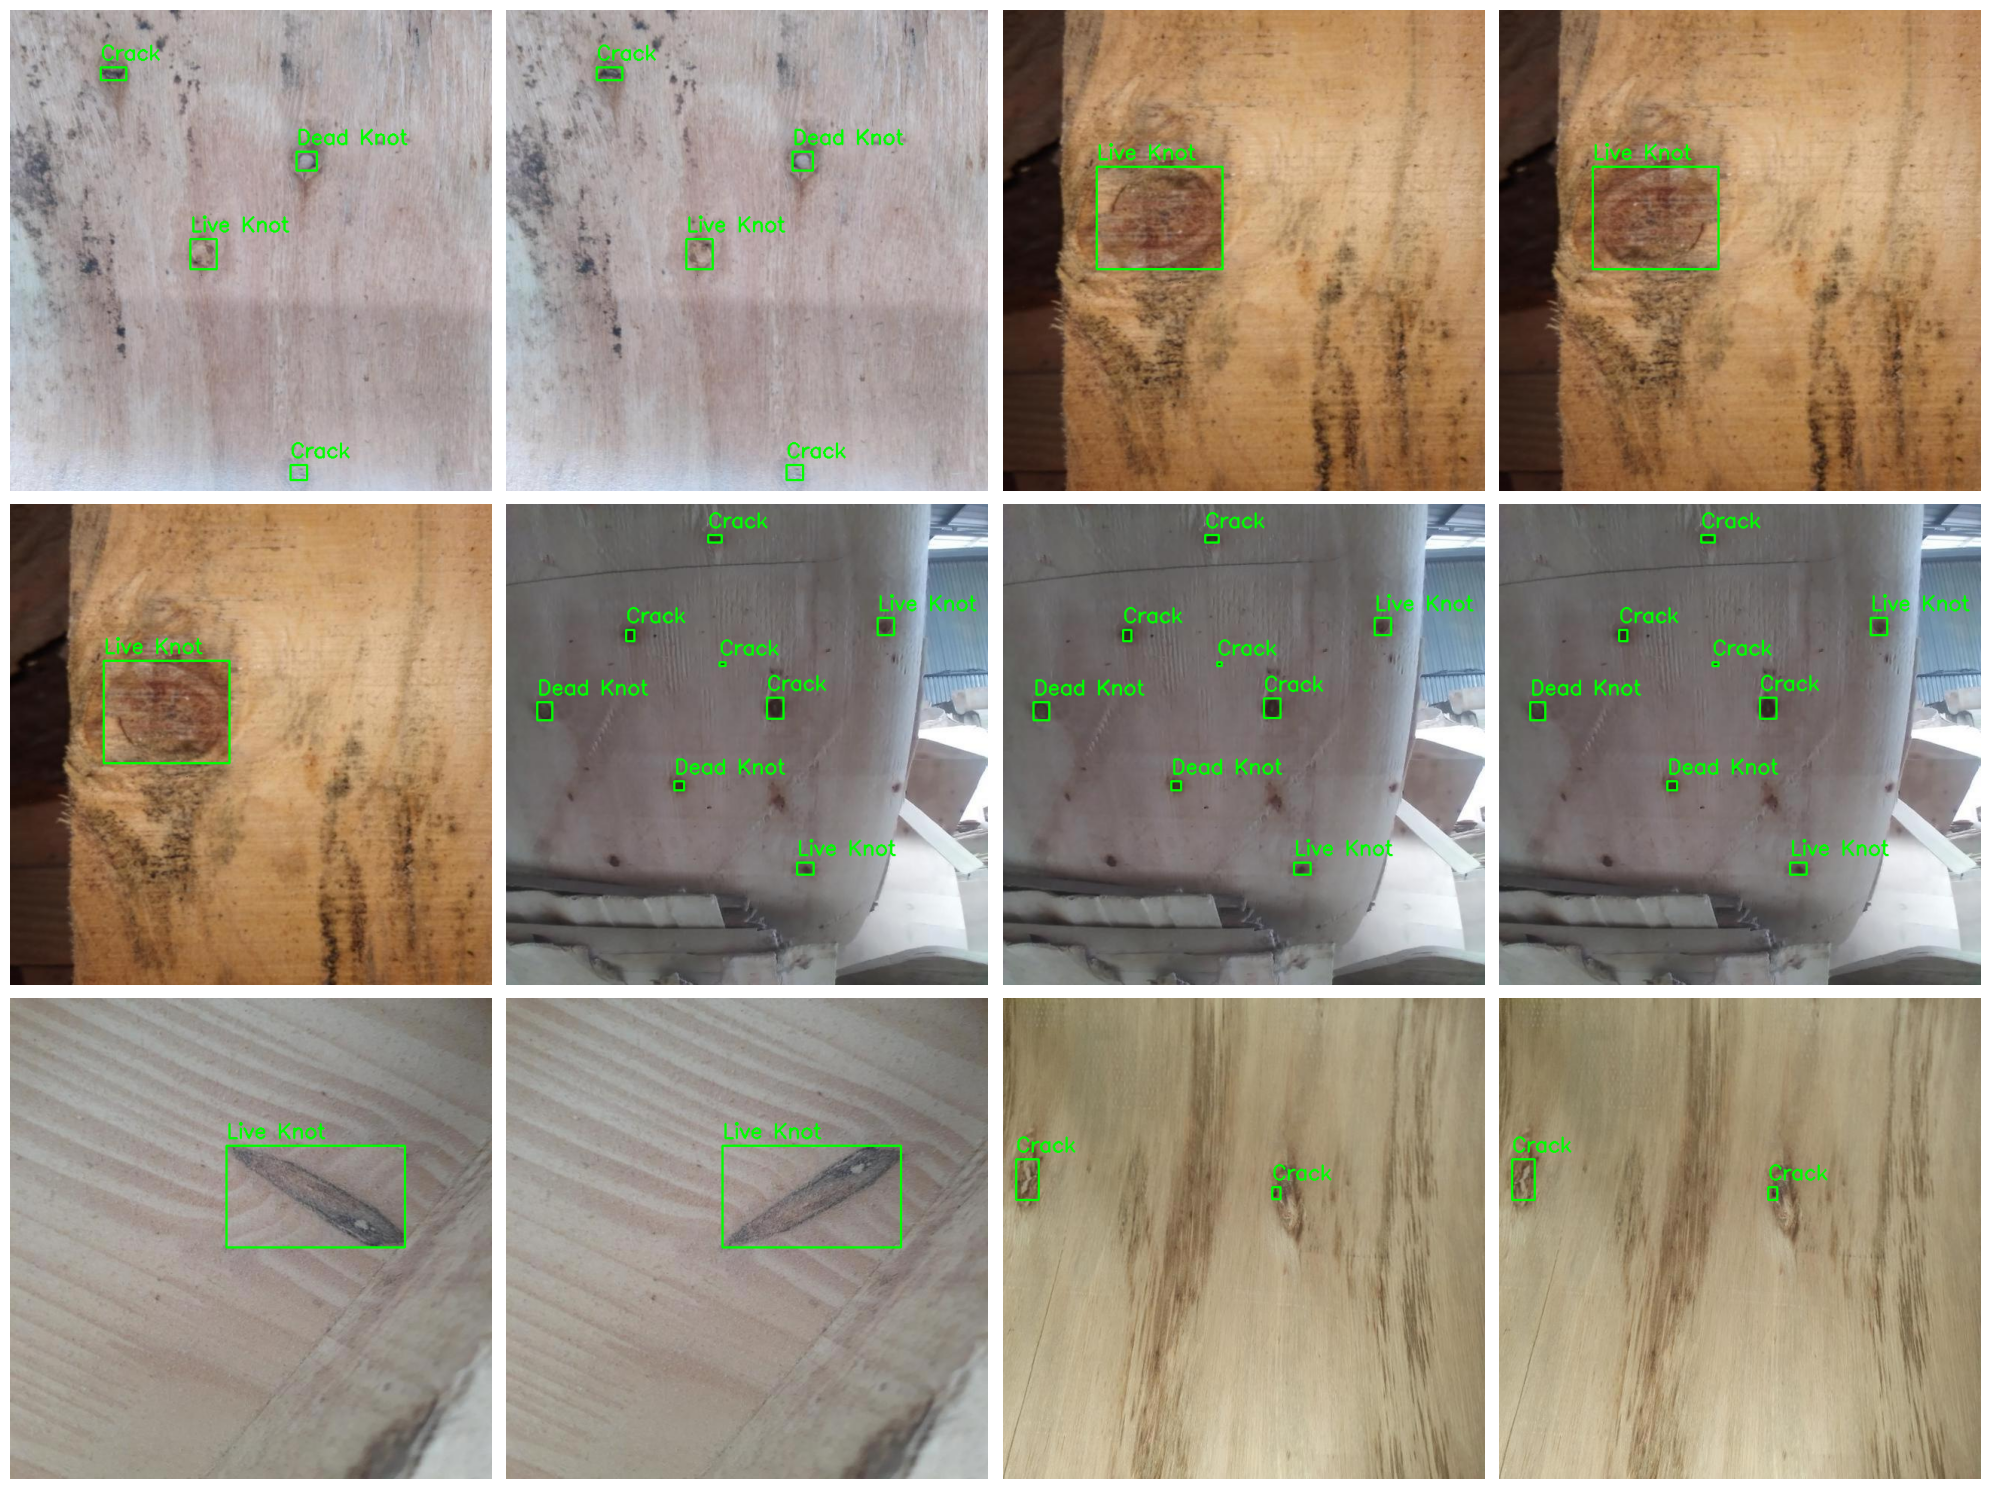

In [10]:

base_dir = '/kaggle/working/wood_data/train'
images_dir = os.path.join(base_dir, 'images')
labels_dir = os.path.join(base_dir, 'labels')
class_names = ['Crack', 'Dead Knot', 'Live Knot']  # Replace with your actual class names

image_files = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')])
label_files = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.txt')])

output_file = 'train_images.png'
plot_images_with_labels(image_files, label_files, class_names, output_file, max_images=12)

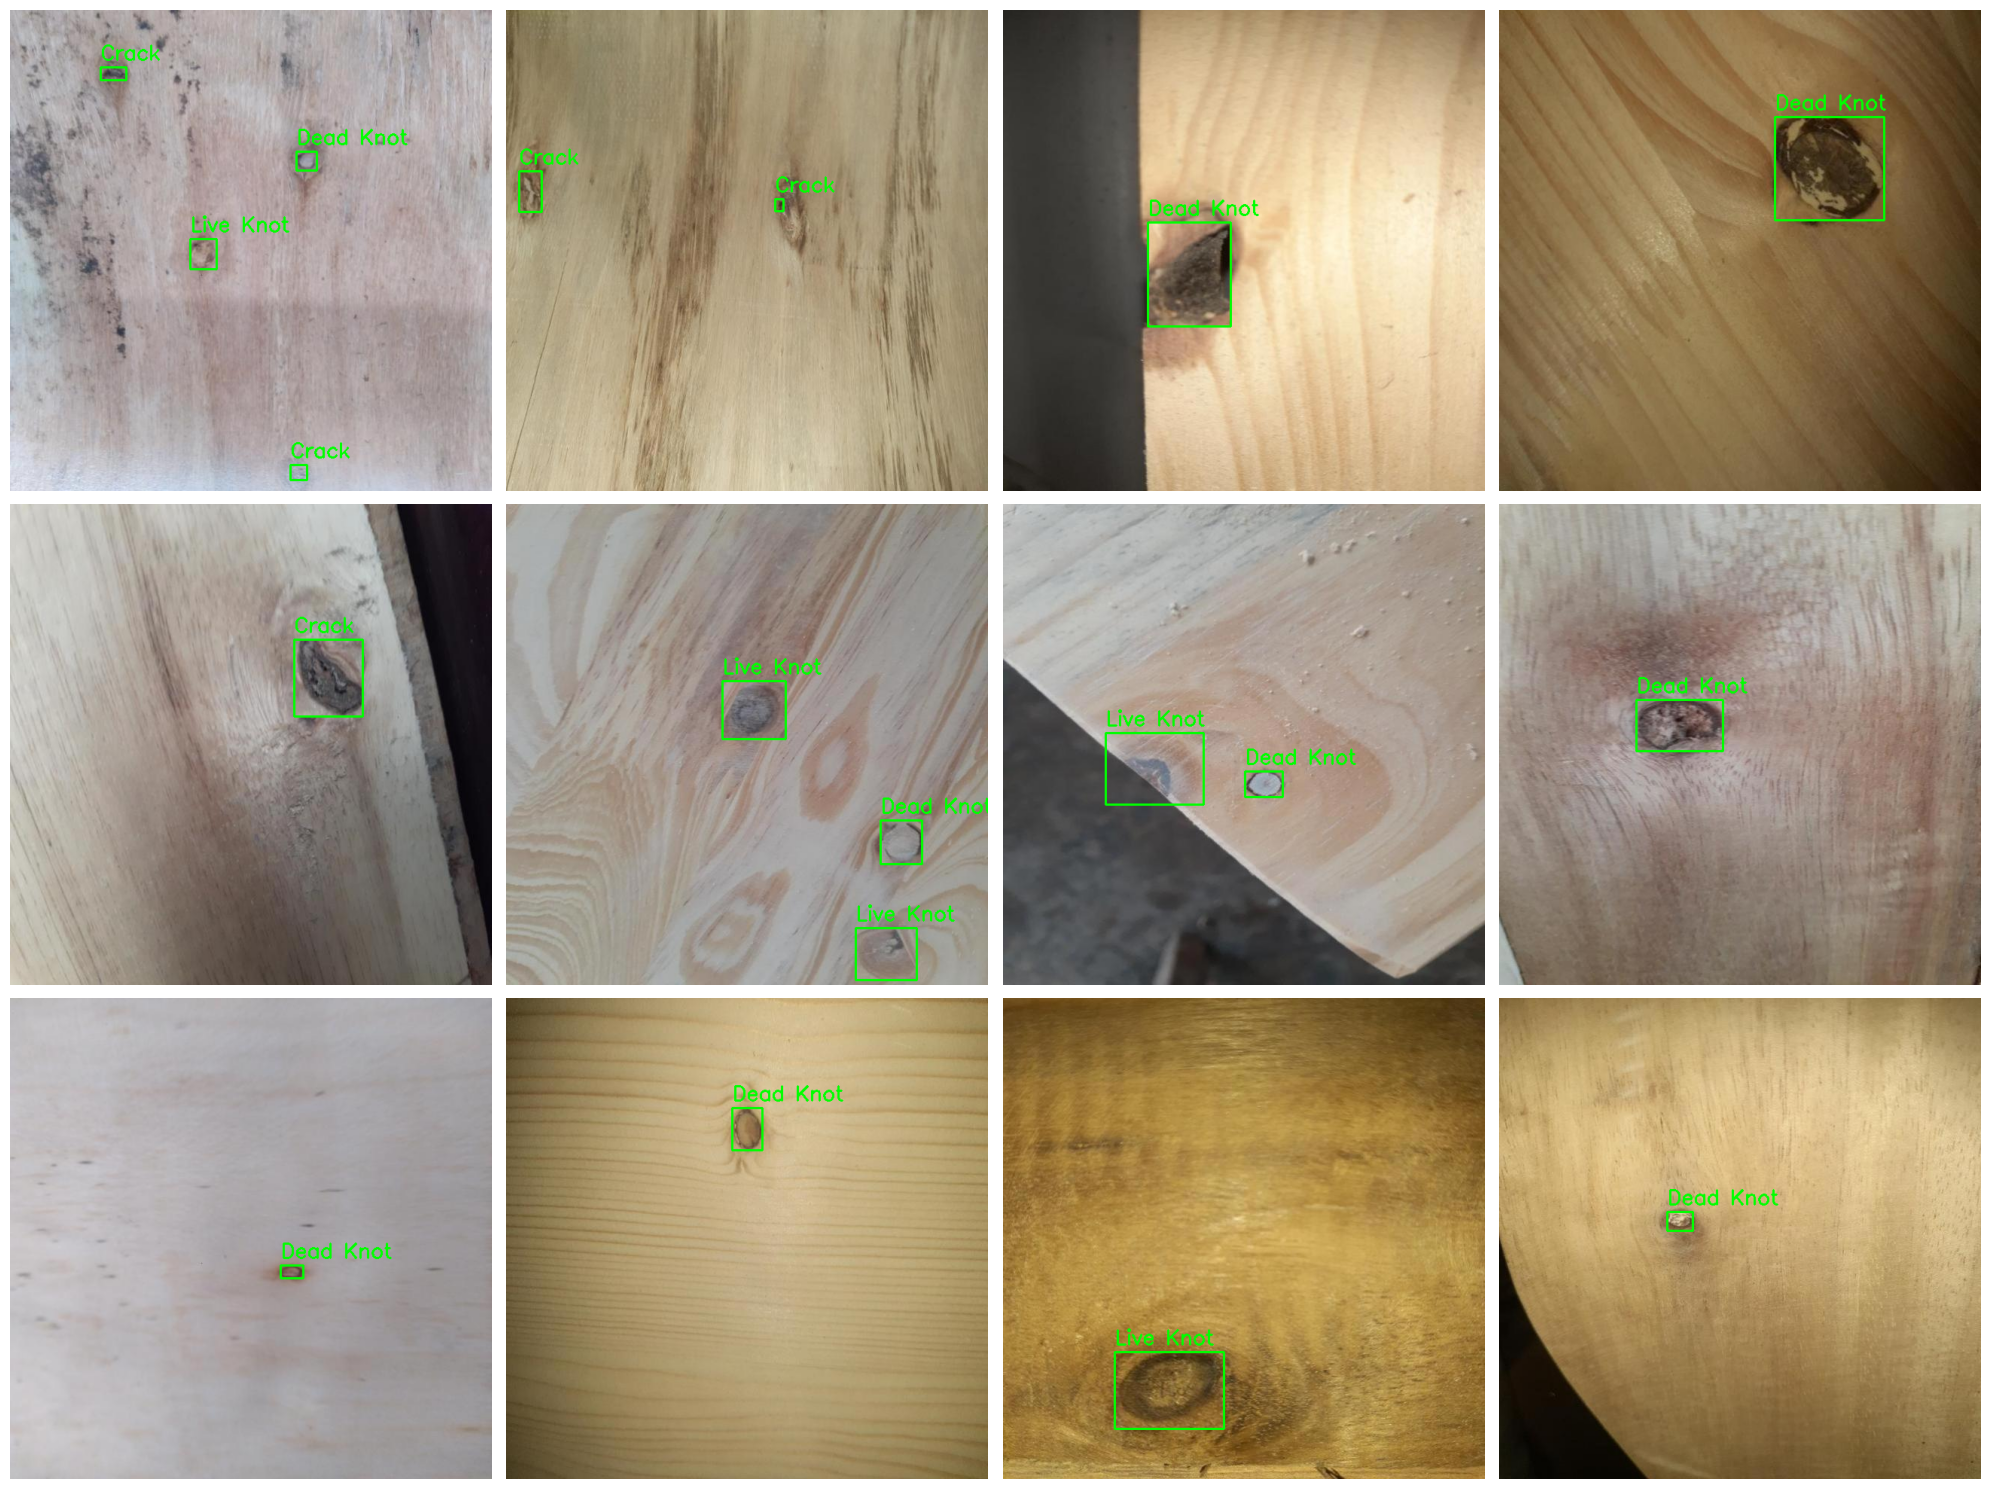

In [11]:

base_dir = '/kaggle/working/wood_data/valid'
images_dir = os.path.join(base_dir, 'images')
labels_dir = os.path.join(base_dir, 'labels')
class_names = ['Crack', 'Dead Knot', 'Live Knot']  # Replace with your actual class names

image_files = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')])
label_files = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.txt')])

output_file = 'valid_images.png'
plot_images_with_labels(image_files, label_files, class_names, output_file, max_images=12)

In [12]:
!pip install super-gradients # yolo_nas  
!pip install pycocotools     # yolo_nas 
!pip install ultralytics     # yolov8  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 18.7 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.9/913.9 kB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [13]:
class config:
    #trainer params
    CHECKPOINT_DIR = '/kaggle/working/yolo_nas_checkpoints' #specify the path you want to save checkpoints to
    EXPERIMENT_NAME = 'wood-defects-detection' #specify the experiment name

    #dataset params
    DATA_DIR = '/kaggle/working/wood_data' #parent directory to where data lives

    TRAIN_IMAGES_DIR = 'train/images' #child dir of DATA_DIR where train images are
    TRAIN_LABELS_DIR = 'train/labels' #child dir of DATA_DIR where train labels are

    VAL_IMAGES_DIR = 'valid/images' #child dir of DATA_DIR where validation images are
    VAL_LABELS_DIR = 'valid/labels' #child dir of DATA_DIR where validation labels are

    # if you have a test set
#     TEST_IMAGES_DIR = 'test/images' #child dir of DATA_DIR where test images are
#     TEST_LABELS_DIR = 'test/labels' #child dir of DATA_DIR where test labels are

    CLASSES = ['Crack', 'Dead Knot', 'Live Knot'] #what class names do you have

    NUM_CLASSES = len(CLASSES)

    #dataloader params - you can add whatever PyTorch dataloader params you have
    #could be different across train, val, and test
    DATALOADER_PARAMS={
    'batch_size':32,
    'num_workers':2
    }

    # model params
    MODEL_NAME = 'yolo_nas_s' # choose from yolo_nas_s, yolo_nas_m, yolo_nas_l
    PRETRAINED_WEIGHTS = 'coco' #only one option here: coco

In [14]:
from super_gradients.training import Trainer, dataloaders, models
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val
)
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import (
    PPYoloEPostPredictionCallback
)


trainer = Trainer(experiment_name=config.EXPERIMENT_NAME, ckpt_root_dir=config.CHECKPOINT_DIR)


train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.VAL_IMAGES_DIR,
        'labels_dir': config.VAL_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

# test_data = coco_detection_yolo_format_val(
#     dataset_params={
#         'data_dir': config.DATA_DIR,
#         'images_dir': config.TEST_IMAGES_DIR,
#         'labels_dir': config.TEST_LABELS_DIR,
#         'classes': config.CLASSES
#     },
#     dataloader_params=config.DATALOADER_PARAMS
# )

The console stream is logged into /root/sg_logs/console.log


[2024-06-29 10:41:38] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
2024-06-29 10:41:42.448535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 10:41:42.448638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 10:41:42.579144: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[2024-06-29 10:41:51] INFO - utils.py - NumExpr defaulting to 4 threads.
[2024-06-29 10:41:54] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take lon

In [15]:
model = models.get(config.MODEL_NAME, 
                   num_classes=config.NUM_CLASSES, 
                   pretrained_weights=config.PRETRAINED_WEIGHTS
                   )

Indexing dataset annotations: 100%|██████████| 455/455 [00:00<00:00, 6121.91it/s]
[2024-06-29 10:41:56] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-06-29 10:41:56] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██

In [16]:
train_params = {
    # ENABLING SILENT MODE
    "average_best_models":True, 
    "warmup_mode": "linear_epoch_step",  
    "warmup_initial_lr": 1e-5,           
    "lr_warmup_epochs": 5,               
    "initial_lr": 3e-4,                 
    "lr_mode": "cosine",                
    "cosine_final_lr_ratio": 0.1,        
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001}, 
    "zero_weight_decay_on_bias_and_bn": True,    
    "ema": True,                          
    "ema_params": {"decay": 0.9, "decay_type": "threshold"}, 
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 30,
    "mixed_precision": True,
    "loss": PPYoloELoss( 
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=config.NUM_CLASSES,
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=config.NUM_CLASSES,
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [17]:
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2024-06-29 10:41:57] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240629_104157_054864`
[2024-06-29 10:41:57] INFO - sg_trainer.py - Checkpoints directory: /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864
[2024-06-29 10:41:57] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/console_Jun29_10_41_57.txt


Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
[2024-06-29 10:42:02] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            4088       (len(train_set))
    - Batch size per GPU:           32         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             32         (num_gpus * batch_s

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.8306
│   ├── Ppyoloeloss/loss_iou = 0.7051
│   ├── Ppyoloeloss/loss_dfl = 0.6238
│   └── Ppyoloeloss/loss = 3.1596
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2251
    ├── Ppyoloeloss/loss_iou = 0.5448
    ├── Ppyoloeloss/loss_dfl = 0.4922
    ├── Ppyoloeloss/loss = 2.2622
    ├── Precision@0.50 = 0.0287
    ├── Recall@0.50 = 0.6157
    ├── Map@0.50 = 0.2358
    ├── F1@0.50 = 0.0546
    └── Best_score_threshold = 0.51



Validating epoch 1: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]
[2024-06-29 10:46:54] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 10:46:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4079919159412384


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1508
│   │   ├── Epoch N-1      = 1.8306 (↘ -0.6798)
│   │   └── Best until now = 1.8306 (↘ -0.6798)
│   ├── Ppyoloeloss/loss_iou = 0.5867
│   │   ├── Epoch N-1      = 0.7051 (↘ -0.1185)
│   │   └── Best until now = 0.7051 (↘ -0.1185)
│   ├── Ppyoloeloss/loss_dfl = 0.5018
│   │   ├── Epoch N-1      = 0.6238 (↘ -0.122)
│   │   └── Best until now = 0.6238 (↘ -0.122)
│   └── Ppyoloeloss/loss = 2.2393
│       ├── Epoch N-1      = 3.1596 (↘ -0.9203)
│       └── Best until now = 3.1596 (↘ -0.9203)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1027
    │   ├── Epoch N-1      = 1.2251 (↘ -0.1224)
    │   └── Best until now = 1.2251 (↘ -0.1224)
    ├── Ppyoloeloss/loss_iou = 0.5029
    │   ├── Epoch N-1      = 0.5448 (↘ -0.0419)
    │   └── Best until now = 0.5448 (↘ -0.0419)
    ├── Ppyoloeloss/loss_dfl = 0.4538
    │   ├── Epoch N-1      = 0.4922 (↘ -0.0384)
    │   └── Best until now = 0.4922 (↘ -0.0384)
    ├── Ppyoloeloss/loss

Validating epoch 2: 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]
[2024-06-29 10:49:18] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 10:49:18] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4602145254611969


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0748
│   │   ├── Epoch N-1      = 1.1508 (↘ -0.076)
│   │   └── Best until now = 1.1508 (↘ -0.076)
│   ├── Ppyoloeloss/loss_iou = 0.5457
│   │   ├── Epoch N-1      = 0.5867 (↘ -0.041)
│   │   └── Best until now = 0.5867 (↘ -0.041)
│   ├── Ppyoloeloss/loss_dfl = 0.4837
│   │   ├── Epoch N-1      = 0.5018 (↘ -0.0181)
│   │   └── Best until now = 0.5018 (↘ -0.0181)
│   └── Ppyoloeloss/loss = 2.1042
│       ├── Epoch N-1      = 2.2393 (↘ -0.1351)
│       └── Best until now = 2.2393 (↘ -0.1351)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1052
    │   ├── Epoch N-1      = 1.1027 (↗ 0.0025)
    │   └── Best until now = 1.1027 (↗ 0.0025)
    ├── Ppyoloeloss/loss_iou = 0.4805
    │   ├── Epoch N-1      = 0.5029 (↘ -0.0224)
    │   └── Best until now = 0.5029 (↘ -0.0224)
    ├── Ppyoloeloss/loss_dfl = 0.4689
    │   ├── Epoch N-1      = 0.4538 (↗ 0.015)
    │   └── Best until now = 0.4538 (↗ 0.015)
    ├── Ppyoloeloss/loss = 2.054

Validating epoch 3: 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]
[2024-06-29 10:51:42] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 10:51:42] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4995366036891937


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0448
│   │   ├── Epoch N-1      = 1.0748 (↘ -0.03)
│   │   └── Best until now = 1.0748 (↘ -0.03)
│   ├── Ppyoloeloss/loss_iou = 0.5275
│   │   ├── Epoch N-1      = 0.5457 (↘ -0.0182)
│   │   └── Best until now = 0.5457 (↘ -0.0182)
│   ├── Ppyoloeloss/loss_dfl = 0.4864
│   │   ├── Epoch N-1      = 0.4837 (↗ 0.0027)
│   │   └── Best until now = 0.4837 (↗ 0.0027)
│   └── Ppyoloeloss/loss = 2.0587
│       ├── Epoch N-1      = 2.1042 (↘ -0.0455)
│       └── Best until now = 2.1042 (↘ -0.0455)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0599
    │   ├── Epoch N-1      = 1.1052 (↘ -0.0453)
    │   └── Best until now = 1.1027 (↘ -0.0428)
    ├── Ppyoloeloss/loss_iou = 0.4653
    │   ├── Epoch N-1      = 0.4805 (↘ -0.0152)
    │   └── Best until now = 0.4805 (↘ -0.0152)
    ├── Ppyoloeloss/loss_dfl = 0.4634
    │   ├── Epoch N-1      = 0.4689 (↘ -0.0055)
    │   └── Best until now = 0.4538 (↗ 0.0096)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 4: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]
[2024-06-29 10:54:06] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 10:54:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5306296348571777


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0346
│   │   ├── Epoch N-1      = 1.0448 (↘ -0.0102)
│   │   └── Best until now = 1.0448 (↘ -0.0102)
│   ├── Ppyoloeloss/loss_iou = 0.5122
│   │   ├── Epoch N-1      = 0.5275 (↘ -0.0153)
│   │   └── Best until now = 0.5275 (↘ -0.0153)
│   ├── Ppyoloeloss/loss_dfl = 0.4852
│   │   ├── Epoch N-1      = 0.4864 (↘ -0.0013)
│   │   └── Best until now = 0.4837 (↗ 0.0015)
│   └── Ppyoloeloss/loss = 2.032
│       ├── Epoch N-1      = 2.0587 (↘ -0.0268)
│       └── Best until now = 2.0587 (↘ -0.0268)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0462
    │   ├── Epoch N-1      = 1.0599 (↘ -0.0138)
    │   └── Best until now = 1.0599 (↘ -0.0138)
    ├── Ppyoloeloss/loss_iou = 0.479
    │   ├── Epoch N-1      = 0.4653 (↗ 0.0137)
    │   └── Best until now = 0.4653 (↗ 0.0137)
    ├── Ppyoloeloss/loss_dfl = 0.4906
    │   ├── Epoch N-1      = 0.4634 (↗ 0.0272)
    │   └── Best until now = 0.4538 (↗ 0.0368)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 5: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0159
│   │   ├── Epoch N-1      = 1.0346 (↘ -0.0187)
│   │   └── Best until now = 1.0346 (↘ -0.0187)
│   ├── Ppyoloeloss/loss_iou = 0.5081
│   │   ├── Epoch N-1      = 0.5122 (↘ -0.0041)
│   │   └── Best until now = 0.5122 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_dfl = 0.4809
│   │   ├── Epoch N-1      = 0.4852 (↘ -0.0043)
│   │   └── Best until now = 0.4837 (↘ -0.0028)
│   └── Ppyoloeloss/loss = 2.0049
│       ├── Epoch N-1      = 2.032  (↘ -0.0271)
│       └── Best until now = 2.032  (↘ -0.0271)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0136
    │   ├── Epoch N-1      = 1.0462 (↘ -0.0326)
    │   └── Best until now = 1.0462 (↘ -0.0326)
    ├── Ppyoloeloss/loss_iou = 0.4644
    │   ├── Epoch N-1      = 0.479  (↘ -0.0146)
    │   └── Best until now = 0.4653 (↘ -0.001)
    ├── Ppyoloeloss/loss_dfl = 0.4652
    │   ├── Epoch N-1      = 0.4906 (↘ -0.0255)
    │   └── Best until now = 0.4538 (↗ 0.0113)
    ├── Ppyoloeloss/loss

Validating epoch 6: 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]
[2024-06-29 10:58:56] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 10:58:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5445488095283508


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9959
│   │   ├── Epoch N-1      = 1.0159 (↘ -0.02)
│   │   └── Best until now = 1.0159 (↘ -0.02)
│   ├── Ppyoloeloss/loss_iou = 0.5029
│   │   ├── Epoch N-1      = 0.5081 (↘ -0.0052)
│   │   └── Best until now = 0.5081 (↘ -0.0052)
│   ├── Ppyoloeloss/loss_dfl = 0.4836
│   │   ├── Epoch N-1      = 0.4809 (↗ 0.0027)
│   │   └── Best until now = 0.4809 (↗ 0.0027)
│   └── Ppyoloeloss/loss = 1.9824
│       ├── Epoch N-1      = 2.0049 (↘ -0.0225)
│       └── Best until now = 2.0049 (↘ -0.0225)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.985
    │   ├── Epoch N-1      = 1.0136 (↘ -0.0286)
    │   └── Best until now = 1.0136 (↘ -0.0286)
    ├── Ppyoloeloss/loss_iou = 0.4618
    │   ├── Epoch N-1      = 0.4644 (↘ -0.0026)
    │   └── Best until now = 0.4644 (↘ -0.0026)
    ├── Ppyoloeloss/loss_dfl = 0.4699
    │   ├── Epoch N-1      = 0.4652 (↗ 0.0047)
    │   └── Best until now = 0.4538 (↗ 0.0161)
    ├── Ppyoloeloss/loss = 1.91

Validating epoch 7: 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]
[2024-06-29 11:01:21] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:01:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6141217350959778


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.976
│   │   ├── Epoch N-1      = 0.9959 (↘ -0.0199)
│   │   └── Best until now = 0.9959 (↘ -0.0199)
│   ├── Ppyoloeloss/loss_iou = 0.4971
│   │   ├── Epoch N-1      = 0.5029 (↘ -0.0059)
│   │   └── Best until now = 0.5029 (↘ -0.0059)
│   ├── Ppyoloeloss/loss_dfl = 0.475
│   │   ├── Epoch N-1      = 0.4836 (↘ -0.0086)
│   │   └── Best until now = 0.4809 (↘ -0.0059)
│   └── Ppyoloeloss/loss = 1.9481
│       ├── Epoch N-1      = 1.9824 (↘ -0.0343)
│       └── Best until now = 1.9824 (↘ -0.0343)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9522
    │   ├── Epoch N-1      = 0.985  (↘ -0.0328)
    │   └── Best until now = 0.985  (↘ -0.0328)
    ├── Ppyoloeloss/loss_iou = 0.4594
    │   ├── Epoch N-1      = 0.4618 (↘ -0.0025)
    │   └── Best until now = 0.4618 (↘ -0.0025)
    ├── Ppyoloeloss/loss_dfl = 0.4625
    │   ├── Epoch N-1      = 0.4699 (↘ -0.0074)
    │   └── Best until now = 0.4538 (↗ 0.0087)
    ├── Ppyoloeloss/loss 

Validating epoch 8: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9685
│   │   ├── Epoch N-1      = 0.976  (↘ -0.0075)
│   │   └── Best until now = 0.976  (↘ -0.0075)
│   ├── Ppyoloeloss/loss_iou = 0.4877
│   │   ├── Epoch N-1      = 0.4971 (↘ -0.0093)
│   │   └── Best until now = 0.4971 (↘ -0.0093)
│   ├── Ppyoloeloss/loss_dfl = 0.4691
│   │   ├── Epoch N-1      = 0.475  (↘ -0.006)
│   │   └── Best until now = 0.475  (↘ -0.006)
│   └── Ppyoloeloss/loss = 1.9253
│       ├── Epoch N-1      = 1.9481 (↘ -0.0228)
│       └── Best until now = 1.9481 (↘ -0.0228)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0088
    │   ├── Epoch N-1      = 0.9522 (↗ 0.0565)
    │   └── Best until now = 0.9522 (↗ 0.0565)
    ├── Ppyoloeloss/loss_iou = 0.4864
    │   ├── Epoch N-1      = 0.4594 (↗ 0.027)
    │   └── Best until now = 0.4594 (↗ 0.027)
    ├── Ppyoloeloss/loss_dfl = 0.4905
    │   ├── Epoch N-1      = 0.4625 (↗ 0.028)
    │   └── Best until now = 0.4538 (↗ 0.0367)
    ├── Ppyoloeloss/loss = 1.9856

Validating epoch 9: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]
[2024-06-29 11:06:11] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:06:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6168984770774841


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9532
│   │   ├── Epoch N-1      = 0.9685 (↘ -0.0154)
│   │   └── Best until now = 0.9685 (↘ -0.0154)
│   ├── Ppyoloeloss/loss_iou = 0.4854
│   │   ├── Epoch N-1      = 0.4877 (↘ -0.0023)
│   │   └── Best until now = 0.4877 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.4676
│   │   ├── Epoch N-1      = 0.4691 (↘ -0.0015)
│   │   └── Best until now = 0.4691 (↘ -0.0015)
│   └── Ppyoloeloss/loss = 1.9062
│       ├── Epoch N-1      = 1.9253 (↘ -0.0191)
│       └── Best until now = 1.9253 (↘ -0.0191)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9422
    │   ├── Epoch N-1      = 1.0088 (↘ -0.0666)
    │   └── Best until now = 0.9522 (↘ -0.0101)
    ├── Ppyoloeloss/loss_iou = 0.4386
    │   ├── Epoch N-1      = 0.4864 (↘ -0.0478)
    │   └── Best until now = 0.4594 (↘ -0.0208)
    ├── Ppyoloeloss/loss_dfl = 0.4438
    │   ├── Epoch N-1      = 0.4905 (↘ -0.0467)
    │   └── Best until now = 0.4538 (↘ -0.01)
    ├── Ppyoloeloss/loss

Validating epoch 10: 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]
[2024-06-29 11:08:40] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:08:40] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6170937418937683


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9479
│   │   ├── Epoch N-1      = 0.9532 (↘ -0.0052)
│   │   └── Best until now = 0.9532 (↘ -0.0052)
│   ├── Ppyoloeloss/loss_iou = 0.4855
│   │   ├── Epoch N-1      = 0.4854 (↗ 0.0)
│   │   └── Best until now = 0.4854 (↗ 0.0)
│   ├── Ppyoloeloss/loss_dfl = 0.4643
│   │   ├── Epoch N-1      = 0.4676 (↘ -0.0033)
│   │   └── Best until now = 0.4676 (↘ -0.0033)
│   └── Ppyoloeloss/loss = 1.8977
│       ├── Epoch N-1      = 1.9062 (↘ -0.0085)
│       └── Best until now = 1.9062 (↘ -0.0085)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9131
    │   ├── Epoch N-1      = 0.9422 (↘ -0.029)
    │   └── Best until now = 0.9422 (↘ -0.029)
    ├── Ppyoloeloss/loss_iou = 0.4439
    │   ├── Epoch N-1      = 0.4386 (↗ 0.0053)
    │   └── Best until now = 0.4386 (↗ 0.0053)
    ├── Ppyoloeloss/loss_dfl = 0.4536
    │   ├── Epoch N-1      = 0.4438 (↗ 0.0098)
    │   └── Best until now = 0.4438 (↗ 0.0098)
    ├── Ppyoloeloss/loss = 1.8107
 

Validating epoch 11: 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]
[2024-06-29 11:11:07] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:11:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6285736560821533


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9359
│   │   ├── Epoch N-1      = 0.9479 (↘ -0.012)
│   │   └── Best until now = 0.9479 (↘ -0.012)
│   ├── Ppyoloeloss/loss_iou = 0.4826
│   │   ├── Epoch N-1      = 0.4855 (↘ -0.0029)
│   │   └── Best until now = 0.4854 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.4664
│   │   ├── Epoch N-1      = 0.4643 (↗ 0.0021)
│   │   └── Best until now = 0.4643 (↗ 0.0021)
│   └── Ppyoloeloss/loss = 1.8849
│       ├── Epoch N-1      = 1.8977 (↘ -0.0128)
│       └── Best until now = 1.8977 (↘ -0.0128)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9488
    │   ├── Epoch N-1      = 0.9131 (↗ 0.0357)
    │   └── Best until now = 0.9131 (↗ 0.0357)
    ├── Ppyoloeloss/loss_iou = 0.4479
    │   ├── Epoch N-1      = 0.4439 (↗ 0.004)
    │   └── Best until now = 0.4386 (↗ 0.0093)
    ├── Ppyoloeloss/loss_dfl = 0.463
    │   ├── Epoch N-1      = 0.4536 (↗ 0.0094)
    │   └── Best until now = 0.4438 (↗ 0.0192)
    ├── Ppyoloeloss/loss = 1.8597

Validating epoch 12: 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]
[2024-06-29 11:13:32] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:13:32] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6419553160667419


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9302
│   │   ├── Epoch N-1      = 0.9359 (↘ -0.0057)
│   │   └── Best until now = 0.9359 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_iou = 0.4807
│   │   ├── Epoch N-1      = 0.4826 (↘ -0.0019)
│   │   └── Best until now = 0.4826 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.4622
│   │   ├── Epoch N-1      = 0.4664 (↘ -0.0042)
│   │   └── Best until now = 0.4643 (↘ -0.0021)
│   └── Ppyoloeloss/loss = 1.8731
│       ├── Epoch N-1      = 1.8849 (↘ -0.0118)
│       └── Best until now = 1.8849 (↘ -0.0118)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9049
    │   ├── Epoch N-1      = 0.9488 (↘ -0.0439)
    │   └── Best until now = 0.9131 (↘ -0.0083)
    ├── Ppyoloeloss/loss_iou = 0.4378
    │   ├── Epoch N-1      = 0.4479 (↘ -0.0101)
    │   └── Best until now = 0.4386 (↘ -0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.4507
    │   ├── Epoch N-1      = 0.463  (↘ -0.0123)
    │   └── Best until now = 0.4438 (↗ 0.0069)
    ├── Ppyoloeloss/lo

Validating epoch 13: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.922
│   │   ├── Epoch N-1      = 0.9302 (↘ -0.0082)
│   │   └── Best until now = 0.9302 (↘ -0.0082)
│   ├── Ppyoloeloss/loss_iou = 0.4734
│   │   ├── Epoch N-1      = 0.4807 (↘ -0.0073)
│   │   └── Best until now = 0.4807 (↘ -0.0073)
│   ├── Ppyoloeloss/loss_dfl = 0.4566
│   │   ├── Epoch N-1      = 0.4622 (↘ -0.0056)
│   │   └── Best until now = 0.4622 (↘ -0.0056)
│   └── Ppyoloeloss/loss = 1.852
│       ├── Epoch N-1      = 1.8731 (↘ -0.0211)
│       └── Best until now = 1.8731 (↘ -0.0211)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0313
    │   ├── Epoch N-1      = 0.9049 (↗ 0.1264)
    │   └── Best until now = 0.9049 (↗ 0.1264)
    ├── Ppyoloeloss/loss_iou = 0.4549
    │   ├── Epoch N-1      = 0.4378 (↗ 0.0171)
    │   └── Best until now = 0.4378 (↗ 0.0171)
    ├── Ppyoloeloss/loss_dfl = 0.4657
    │   ├── Epoch N-1      = 0.4507 (↗ 0.015)
    │   └── Best until now = 0.4438 (↗ 0.0219)
    ├── Ppyoloeloss/loss = 1.9

Validating epoch 14: 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9109
│   │   ├── Epoch N-1      = 0.922  (↘ -0.0112)
│   │   └── Best until now = 0.922  (↘ -0.0112)
│   ├── Ppyoloeloss/loss_iou = 0.4697
│   │   ├── Epoch N-1      = 0.4734 (↘ -0.0037)
│   │   └── Best until now = 0.4734 (↘ -0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.4515
│   │   ├── Epoch N-1      = 0.4566 (↘ -0.0051)
│   │   └── Best until now = 0.4566 (↘ -0.0051)
│   └── Ppyoloeloss/loss = 1.832
│       ├── Epoch N-1      = 1.852  (↘ -0.0199)
│       └── Best until now = 1.852  (↘ -0.0199)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9064
    │   ├── Epoch N-1      = 1.0313 (↘ -0.1248)
    │   └── Best until now = 0.9049 (↗ 0.0016)
    ├── Ppyoloeloss/loss_iou = 0.4464
    │   ├── Epoch N-1      = 0.4549 (↘ -0.0085)
    │   └── Best until now = 0.4378 (↗ 0.0086)
    ├── Ppyoloeloss/loss_dfl = 0.4502
    │   ├── Epoch N-1      = 0.4657 (↘ -0.0155)
    │   └── Best until now = 0.4438 (↗ 0.0064)
    ├── Ppyoloeloss/loss 

Validating epoch 15: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]
[2024-06-29 11:20:49] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:20:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6522418856620789


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9085
│   │   ├── Epoch N-1      = 0.9109 (↘ -0.0024)
│   │   └── Best until now = 0.9109 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.4657
│   │   ├── Epoch N-1      = 0.4697 (↘ -0.0039)
│   │   └── Best until now = 0.4697 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.4476
│   │   ├── Epoch N-1      = 0.4515 (↘ -0.0039)
│   │   └── Best until now = 0.4515 (↘ -0.0039)
│   └── Ppyoloeloss/loss = 1.8219
│       ├── Epoch N-1      = 1.832  (↘ -0.0102)
│       └── Best until now = 1.832  (↘ -0.0102)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8852
    │   ├── Epoch N-1      = 0.9064 (↘ -0.0213)
    │   └── Best until now = 0.9049 (↘ -0.0197)
    ├── Ppyoloeloss/loss_iou = 0.4361
    │   ├── Epoch N-1      = 0.4464 (↘ -0.0102)
    │   └── Best until now = 0.4378 (↘ -0.0017)
    ├── Ppyoloeloss/loss_dfl = 0.4416
    │   ├── Epoch N-1      = 0.4502 (↘ -0.0086)
    │   └── Best until now = 0.4438 (↘ -0.0022)
    ├── Ppyoloeloss/l

Validating epoch 16: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]
[2024-06-29 11:23:17] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:23:17] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6538801193237305


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8926
│   │   ├── Epoch N-1      = 0.9085 (↘ -0.0159)
│   │   └── Best until now = 0.9085 (↘ -0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.463
│   │   ├── Epoch N-1      = 0.4657 (↘ -0.0028)
│   │   └── Best until now = 0.4657 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.4506
│   │   ├── Epoch N-1      = 0.4476 (↗ 0.003)
│   │   └── Best until now = 0.4476 (↗ 0.003)
│   └── Ppyoloeloss/loss = 1.8062
│       ├── Epoch N-1      = 1.8219 (↘ -0.0156)
│       └── Best until now = 1.8219 (↘ -0.0156)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9022
    │   ├── Epoch N-1      = 0.8852 (↗ 0.0171)
    │   └── Best until now = 0.8852 (↗ 0.0171)
    ├── Ppyoloeloss/loss_iou = 0.431
    │   ├── Epoch N-1      = 0.4361 (↘ -0.0051)
    │   └── Best until now = 0.4361 (↘ -0.0051)
    ├── Ppyoloeloss/loss_dfl = 0.4478
    │   ├── Epoch N-1      = 0.4416 (↗ 0.0062)
    │   └── Best until now = 0.4416 (↗ 0.0062)
    ├── Ppyoloeloss/loss = 1.78

Validating epoch 17: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8865
│   │   ├── Epoch N-1      = 0.8926 (↘ -0.0062)
│   │   └── Best until now = 0.8926 (↘ -0.0062)
│   ├── Ppyoloeloss/loss_iou = 0.4579
│   │   ├── Epoch N-1      = 0.463  (↘ -0.005)
│   │   └── Best until now = 0.463  (↘ -0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.4434
│   │   ├── Epoch N-1      = 0.4506 (↘ -0.0072)
│   │   └── Best until now = 0.4476 (↘ -0.0042)
│   └── Ppyoloeloss/loss = 1.7878
│       ├── Epoch N-1      = 1.8062 (↘ -0.0184)
│       └── Best until now = 1.8062 (↘ -0.0184)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9364
    │   ├── Epoch N-1      = 0.9022 (↗ 0.0342)
    │   └── Best until now = 0.8852 (↗ 0.0513)
    ├── Ppyoloeloss/loss_iou = 0.4423
    │   ├── Epoch N-1      = 0.431  (↗ 0.0112)
    │   └── Best until now = 0.431  (↗ 0.0112)
    ├── Ppyoloeloss/loss_dfl = 0.4502
    │   ├── Epoch N-1      = 0.4478 (↗ 0.0024)
    │   └── Best until now = 0.4416 (↗ 0.0086)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 18: 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8814
│   │   ├── Epoch N-1      = 0.8865 (↘ -0.005)
│   │   └── Best until now = 0.8865 (↘ -0.005)
│   ├── Ppyoloeloss/loss_iou = 0.4566
│   │   ├── Epoch N-1      = 0.4579 (↘ -0.0013)
│   │   └── Best until now = 0.4579 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.4441
│   │   ├── Epoch N-1      = 0.4434 (↗ 0.0007)
│   │   └── Best until now = 0.4434 (↗ 0.0007)
│   └── Ppyoloeloss/loss = 1.7822
│       ├── Epoch N-1      = 1.7878 (↘ -0.0056)
│       └── Best until now = 1.7878 (↘ -0.0056)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9304
    │   ├── Epoch N-1      = 0.9364 (↘ -0.006)
    │   └── Best until now = 0.8852 (↗ 0.0452)
    ├── Ppyoloeloss/loss_iou = 0.4493
    │   ├── Epoch N-1      = 0.4423 (↗ 0.007)
    │   └── Best until now = 0.431  (↗ 0.0182)
    ├── Ppyoloeloss/loss_dfl = 0.4614
    │   ├── Epoch N-1      = 0.4502 (↗ 0.0112)
    │   └── Best until now = 0.4416 (↗ 0.0198)
    ├── Ppyoloeloss/loss = 1.841

Validating epoch 19: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]
[2024-06-29 11:30:35] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:30:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6727147698402405


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8678
│   │   ├── Epoch N-1      = 0.8814 (↘ -0.0136)
│   │   └── Best until now = 0.8814 (↘ -0.0136)
│   ├── Ppyoloeloss/loss_iou = 0.4512
│   │   ├── Epoch N-1      = 0.4566 (↘ -0.0054)
│   │   └── Best until now = 0.4566 (↘ -0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.4398
│   │   ├── Epoch N-1      = 0.4441 (↘ -0.0043)
│   │   └── Best until now = 0.4434 (↘ -0.0036)
│   └── Ppyoloeloss/loss = 1.7588
│       ├── Epoch N-1      = 1.7822 (↘ -0.0234)
│       └── Best until now = 1.7822 (↘ -0.0234)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8919
    │   ├── Epoch N-1      = 0.9304 (↘ -0.0385)
    │   └── Best until now = 0.8852 (↗ 0.0067)
    ├── Ppyoloeloss/loss_iou = 0.4436
    │   ├── Epoch N-1      = 0.4493 (↘ -0.0057)
    │   └── Best until now = 0.431  (↗ 0.0126)
    ├── Ppyoloeloss/loss_dfl = 0.4459
    │   ├── Epoch N-1      = 0.4614 (↘ -0.0155)
    │   └── Best until now = 0.4416 (↗ 0.0043)
    ├── Ppyoloeloss/loss

Validating epoch 20: 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8665
│   │   ├── Epoch N-1      = 0.8678 (↘ -0.0012)
│   │   └── Best until now = 0.8678 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.4473
│   │   ├── Epoch N-1      = 0.4512 (↘ -0.0039)
│   │   └── Best until now = 0.4512 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.438
│   │   ├── Epoch N-1      = 0.4398 (↘ -0.0018)
│   │   └── Best until now = 0.4398 (↘ -0.0018)
│   └── Ppyoloeloss/loss = 1.7518
│       ├── Epoch N-1      = 1.7588 (↘ -0.0069)
│       └── Best until now = 1.7588 (↘ -0.0069)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9015
    │   ├── Epoch N-1      = 0.8919 (↗ 0.0096)
    │   └── Best until now = 0.8852 (↗ 0.0164)
    ├── Ppyoloeloss/loss_iou = 0.4266
    │   ├── Epoch N-1      = 0.4436 (↘ -0.0171)
    │   └── Best until now = 0.431  (↘ -0.0045)
    ├── Ppyoloeloss/loss_dfl = 0.4454
    │   ├── Epoch N-1      = 0.4459 (↘ -0.0005)
    │   └── Best until now = 0.4416 (↗ 0.0038)
    ├── Ppyoloeloss/loss 

Validating epoch 21: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8536
│   │   ├── Epoch N-1      = 0.8665 (↘ -0.0129)
│   │   └── Best until now = 0.8665 (↘ -0.0129)
│   ├── Ppyoloeloss/loss_iou = 0.4505
│   │   ├── Epoch N-1      = 0.4473 (↗ 0.0033)
│   │   └── Best until now = 0.4473 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_dfl = 0.4411
│   │   ├── Epoch N-1      = 0.438  (↗ 0.0031)
│   │   └── Best until now = 0.438  (↗ 0.0031)
│   └── Ppyoloeloss/loss = 1.7452
│       ├── Epoch N-1      = 1.7518 (↘ -0.0066)
│       └── Best until now = 1.7518 (↘ -0.0066)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9278
    │   ├── Epoch N-1      = 0.9015 (↗ 0.0263)
    │   └── Best until now = 0.8852 (↗ 0.0427)
    ├── Ppyoloeloss/loss_iou = 0.4269
    │   ├── Epoch N-1      = 0.4266 (↗ 0.0004)
    │   └── Best until now = 0.4266 (↗ 0.0004)
    ├── Ppyoloeloss/loss_dfl = 0.4435
    │   ├── Epoch N-1      = 0.4454 (↘ -0.0019)
    │   └── Best until now = 0.4416 (↗ 0.0019)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 22: 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8528
│   │   ├── Epoch N-1      = 0.8536 (↘ -0.0008)
│   │   └── Best until now = 0.8536 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_iou = 0.4412
│   │   ├── Epoch N-1      = 0.4505 (↘ -0.0093)
│   │   └── Best until now = 0.4473 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.4297
│   │   ├── Epoch N-1      = 0.4411 (↘ -0.0114)
│   │   └── Best until now = 0.438  (↘ -0.0083)
│   └── Ppyoloeloss/loss = 1.7237
│       ├── Epoch N-1      = 1.7452 (↘ -0.0215)
│       └── Best until now = 1.7452 (↘ -0.0215)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9322
    │   ├── Epoch N-1      = 0.9278 (↗ 0.0044)
    │   └── Best until now = 0.8852 (↗ 0.047)
    ├── Ppyoloeloss/loss_iou = 0.4279
    │   ├── Epoch N-1      = 0.4269 (↗ 0.001)
    │   └── Best until now = 0.4266 (↗ 0.0014)
    ├── Ppyoloeloss/loss_dfl = 0.4403
    │   ├── Epoch N-1      = 0.4435 (↘ -0.0032)
    │   └── Best until now = 0.4416 (↘ -0.0013)
    ├── Ppyoloeloss/loss = 

Validating epoch 23: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8416
│   │   ├── Epoch N-1      = 0.8528 (↘ -0.0112)
│   │   └── Best until now = 0.8528 (↘ -0.0112)
│   ├── Ppyoloeloss/loss_iou = 0.4383
│   │   ├── Epoch N-1      = 0.4412 (↘ -0.0029)
│   │   └── Best until now = 0.4412 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.4347
│   │   ├── Epoch N-1      = 0.4297 (↗ 0.005)
│   │   └── Best until now = 0.4297 (↗ 0.005)
│   └── Ppyoloeloss/loss = 1.7146
│       ├── Epoch N-1      = 1.7237 (↘ -0.0091)
│       └── Best until now = 1.7237 (↘ -0.0091)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9045
    │   ├── Epoch N-1      = 0.9322 (↘ -0.0277)
    │   └── Best until now = 0.8852 (↗ 0.0193)
    ├── Ppyoloeloss/loss_iou = 0.4282
    │   ├── Epoch N-1      = 0.4279 (↗ 0.0003)
    │   └── Best until now = 0.4266 (↗ 0.0016)
    ├── Ppyoloeloss/loss_dfl = 0.4446
    │   ├── Epoch N-1      = 0.4403 (↗ 0.0043)
    │   └── Best until now = 0.4403 (↗ 0.0043)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 24: 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]
[2024-06-29 11:42:44] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:42:44] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6811550259590149


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8345
│   │   ├── Epoch N-1      = 0.8416 (↘ -0.0071)
│   │   └── Best until now = 0.8416 (↘ -0.0071)
│   ├── Ppyoloeloss/loss_iou = 0.4352
│   │   ├── Epoch N-1      = 0.4383 (↘ -0.0031)
│   │   └── Best until now = 0.4383 (↘ -0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.4296
│   │   ├── Epoch N-1      = 0.4347 (↘ -0.0051)
│   │   └── Best until now = 0.4297 (↘ -1e-04)
│   └── Ppyoloeloss/loss = 1.6993
│       ├── Epoch N-1      = 1.7146 (↘ -0.0153)
│       └── Best until now = 1.7146 (↘ -0.0153)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9282
    │   ├── Epoch N-1      = 0.9045 (↗ 0.0237)
    │   └── Best until now = 0.8852 (↗ 0.043)
    ├── Ppyoloeloss/loss_iou = 0.409
    │   ├── Epoch N-1      = 0.4282 (↘ -0.0191)
    │   └── Best until now = 0.4266 (↘ -0.0175)
    ├── Ppyoloeloss/loss_dfl = 0.431
    │   ├── Epoch N-1      = 0.4446 (↘ -0.0135)
    │   └── Best until now = 0.4403 (↘ -0.0093)
    ├── Ppyoloeloss/loss = 

Validating epoch 25: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8313
│   │   ├── Epoch N-1      = 0.8345 (↘ -0.0032)
│   │   └── Best until now = 0.8345 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_iou = 0.4311
│   │   ├── Epoch N-1      = 0.4352 (↘ -0.0041)
│   │   └── Best until now = 0.4352 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_dfl = 0.4242
│   │   ├── Epoch N-1      = 0.4296 (↘ -0.0054)
│   │   └── Best until now = 0.4296 (↘ -0.0054)
│   └── Ppyoloeloss/loss = 1.6866
│       ├── Epoch N-1      = 1.6993 (↘ -0.0127)
│       └── Best until now = 1.6993 (↘ -0.0127)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8877
    │   ├── Epoch N-1      = 0.9282 (↘ -0.0405)
    │   └── Best until now = 0.8852 (↗ 0.0026)
    ├── Ppyoloeloss/loss_iou = 0.4224
    │   ├── Epoch N-1      = 0.409  (↗ 0.0134)
    │   └── Best until now = 0.409  (↗ 0.0134)
    ├── Ppyoloeloss/loss_dfl = 0.4328
    │   ├── Epoch N-1      = 0.431  (↗ 0.0018)
    │   └── Best until now = 0.431  (↗ 0.0018)
    ├── Ppyoloeloss/loss =

Validating epoch 26: 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]
[2024-06-29 11:47:38] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:47:38] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7036612629890442


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8222
│   │   ├── Epoch N-1      = 0.8313 (↘ -0.0091)
│   │   └── Best until now = 0.8313 (↘ -0.0091)
│   ├── Ppyoloeloss/loss_iou = 0.4338
│   │   ├── Epoch N-1      = 0.4311 (↗ 0.0027)
│   │   └── Best until now = 0.4311 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.4211
│   │   ├── Epoch N-1      = 0.4242 (↘ -0.0031)
│   │   └── Best until now = 0.4242 (↘ -0.0031)
│   └── Ppyoloeloss/loss = 1.6771
│       ├── Epoch N-1      = 1.6866 (↘ -0.0095)
│       └── Best until now = 1.6866 (↘ -0.0095)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8631
    │   ├── Epoch N-1      = 0.8877 (↘ -0.0247)
    │   └── Best until now = 0.8852 (↘ -0.0221)
    ├── Ppyoloeloss/loss_iou = 0.4319
    │   ├── Epoch N-1      = 0.4224 (↗ 0.0095)
    │   └── Best until now = 0.409  (↗ 0.0228)
    ├── Ppyoloeloss/loss_dfl = 0.4409
    │   ├── Epoch N-1      = 0.4328 (↗ 0.0081)
    │   └── Best until now = 0.431  (↗ 0.0099)
    ├── Ppyoloeloss/loss = 

Validating epoch 27: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8181
│   │   ├── Epoch N-1      = 0.8222 (↘ -0.004)
│   │   └── Best until now = 0.8222 (↘ -0.004)
│   ├── Ppyoloeloss/loss_iou = 0.4293
│   │   ├── Epoch N-1      = 0.4338 (↘ -0.0045)
│   │   └── Best until now = 0.4311 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.4236
│   │   ├── Epoch N-1      = 0.4211 (↗ 0.0025)
│   │   └── Best until now = 0.4211 (↗ 0.0025)
│   └── Ppyoloeloss/loss = 1.6711
│       ├── Epoch N-1      = 1.6771 (↘ -0.006)
│       └── Best until now = 1.6771 (↘ -0.006)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8706
    │   ├── Epoch N-1      = 0.8631 (↗ 0.0075)
    │   └── Best until now = 0.8631 (↗ 0.0075)
    ├── Ppyoloeloss/loss_iou = 0.4223
    │   ├── Epoch N-1      = 0.4319 (↘ -0.0096)
    │   └── Best until now = 0.409  (↗ 0.0132)
    ├── Ppyoloeloss/loss_dfl = 0.4381
    │   ├── Epoch N-1      = 0.4409 (↘ -0.0028)
    │   └── Best until now = 0.431  (↗ 0.0071)
    ├── Ppyoloeloss/loss = 1.73

Validating epoch 28: 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]
[2024-06-29 11:52:31] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_checkpoints/wood-defects-detection/RUN_20240629_104157_054864/ckpt_best.pth
[2024-06-29 11:52:31] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.704855740070343


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8136
│   │   ├── Epoch N-1      = 0.8181 (↘ -0.0046)
│   │   └── Best until now = 0.8181 (↘ -0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.4224
│   │   ├── Epoch N-1      = 0.4293 (↘ -0.0069)
│   │   └── Best until now = 0.4293 (↘ -0.0069)
│   ├── Ppyoloeloss/loss_dfl = 0.4181
│   │   ├── Epoch N-1      = 0.4236 (↘ -0.0055)
│   │   └── Best until now = 0.4211 (↘ -0.003)
│   └── Ppyoloeloss/loss = 1.654
│       ├── Epoch N-1      = 1.6711 (↘ -0.017)
│       └── Best until now = 1.6711 (↘ -0.017)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8773
    │   ├── Epoch N-1      = 0.8706 (↗ 0.0068)
    │   └── Best until now = 0.8631 (↗ 0.0143)
    ├── Ppyoloeloss/loss_iou = 0.4203
    │   ├── Epoch N-1      = 0.4223 (↘ -0.002)
    │   └── Best until now = 0.409  (↗ 0.0113)
    ├── Ppyoloeloss/loss_dfl = 0.4349
    │   ├── Epoch N-1      = 0.4381 (↘ -0.0032)
    │   └── Best until now = 0.431  (↗ 0.0039)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 29: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.804
│   │   ├── Epoch N-1      = 0.8136 (↘ -0.0095)
│   │   └── Best until now = 0.8136 (↘ -0.0095)
│   ├── Ppyoloeloss/loss_iou = 0.4228
│   │   ├── Epoch N-1      = 0.4224 (↗ 0.0004)
│   │   └── Best until now = 0.4224 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.4171
│   │   ├── Epoch N-1      = 0.4181 (↘ -0.001)
│   │   └── Best until now = 0.4181 (↘ -0.001)
│   └── Ppyoloeloss/loss = 1.6439
│       ├── Epoch N-1      = 1.654  (↘ -0.0102)
│       └── Best until now = 1.654  (↘ -0.0102)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9148
    │   ├── Epoch N-1      = 0.8773 (↗ 0.0375)
    │   └── Best until now = 0.8631 (↗ 0.0518)
    ├── Ppyoloeloss/loss_iou = 0.4235
    │   ├── Epoch N-1      = 0.4203 (↗ 0.0032)
    │   └── Best until now = 0.409  (↗ 0.0144)
    ├── Ppyoloeloss/loss_dfl = 0.4348
    │   ├── Epoch N-1      = 0.4349 (↘ -1e-04)
    │   └── Best until now = 0.431  (↗ 0.0038)
    ├── Ppyoloeloss/loss = 1.773

[2024-06-29 11:55:03] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 30: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]


In [18]:
data_yaml = "/kaggle/working/wood_defects_data.yaml"

data = """train: /kaggle/working/wood_data/train/images
val: /kaggle/working/wood_data/valid/images
#test: ../test/images

nc: 3
names: ['Crack', 'Dead Knot', 'Live Knot']
"""

with open(data_yaml, 'w') as f:
    f.write(data)

In [19]:
!pip install wandb 

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
wandb_api = user_secrets.get_secret("ShusenAPI")

import wandb
wandb.login(key=wandb_api) 
runs = wandb.init(
        project="wood_defects",
        # name=f"experiment",
        notes="Epoch30 Batch32",
        tags=["wood defects detect","Yolov8s"]
        ) 

[2024-06-29 11:55:10] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


distutils Version classes are deprecated. Use packaging.version instead.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
wandb: Currently logged in as: pradhanujan2003 (ujan2003). Use `wandb login --relogin` to force relogin


Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


In [ ]:
!yolo train model=yolov8s.pt data={data_yaml} epochs=30 batch=32 patience=2 save_period=5 device=[0] 

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 210MB/s]
Ultralytics YOLOv8.2.46 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/wood_defects_data.yaml, epochs=30, time=None, patience=2, batch=32, imgsz=640, save=True, save_period=5, cache=False, device=[0], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

In [ ]:
!pip install pytube 

from pytube import YouTube
yt = YouTube("https://www.youtube.com/shorts/beJtyItIquE?feature=share")
print(yt.title)   

!mkdir download_videos
yt.streams.first().download("download_videos")

In [ ]:
!yolo predict model=/kaggle/working/runs/detect/train/weights/best.pt source='download_videos/knot repair.mp4' conf=0.50

In [ ]:
!ffmpeg -y -i "runs/detect/predict/knot repair.avi" -vf "fps=10" -loop 0 download_videos/yolov8s.gif

from IPython.display import Image
Image(open('download_videos/yolov8s.gif','rb').read())

In [ ]:
base_path = '/kaggle/working/yolo_nas_checkpoints/wood-defects-detection/'  
entries = os.listdir(base_path) 
folders = [f for f in entries if os.path.isdir(os.path.join(base_path, f))]  

best_model = models.get(config.MODEL_NAME,
                        num_classes=config.NUM_CLASSES,
                        checkpoint_path=f"/kaggle/working/yolo_nas_checkpoints/wood-defects-detection/{folders[0]}/average_model.pth")

In [ ]:
best_model.predict("/kaggle/working/download_videos/knot repair.mp4", conf=0.50).save('download_videos/yolo_nas_s.mp4')

In [ ]:
!ffmpeg -y -i download_videos/yolo_nas_s.mp4 -vf "fps=10" -loop 0 download_videos/yolo_nas_s.gif

from IPython.display import Image
Image(open('download_videos/yolo_nas_s.gif','rb').read())

In [ ]:
!rm -rf /kaggle/working/wood_2_3-2 /kaggle/working/wandb /kaggle/working/yolov8s.pt /kaggle/working/yolov8n.pt